In [8]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [9]:
report = """
'bert-base-uncased'
Average Loss: 0.2281

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7263, precision: 0.7685, recall: 0.7640, f1-score: 0.7662, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.8290, precision: 0.8062, recall: 0.7573, f1-score: 0.7810, support: 4351.0000
  Conflict:                              binary_accuracy: 0.8898, precision: 0.7340, recall: 0.5742, f1-score: 0.6444, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.8163, precision: 0.7164, recall: 0.2992, f1-score: 0.4221, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.8609, precision: 0.7641, recall: 0.5845, f1-score: 0.6623, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.9144, precision: 0.6069, recall: 0.1091, f1-score: 0.1850, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.9212, precision: 0.7091, recall: 0.0446, f1-score: 0.0840, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.9236, precision: 0.6652, recall: 0.3149, f1-score: 0.4275, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.9406, precision: 0.7806, recall: 0.4075, f1-score: 0.5355, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.9616, precision: 0.6667, recall: 0.1718, f1-score: 0.2732, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.9636, precision: 0.6444, recall: 0.0714, f1-score: 0.1286, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.9640, precision: 0.0000, recall: 0.0000, f1-score: 0.0000, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9745, precision: 0.5691, recall: 0.2389, f1-score: 0.3365, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.9918, precision: 0.0000, recall: 0.0000, f1-score: 0.0000, support: 89.0000
  micro avg:                             binary_accuracy: 0.9055, precision: 0.7640, recall: 0.5430, f1-score: 0.6348, support: 22871.0000
  macro avg:                             binary_accuracy: 0.9055, precision: 0.6022, recall: 0.3098, f1-score: 0.3747, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.9055, precision: 0.7310, recall: 0.5430, f1-score: 0.5943, support: 22871.0000
  samples avg:                           binary_accuracy: 0.9055, precision: 0.7346, recall: 0.5969, f1-score: 0.6180, support: 22871.0000

BERT Unfrozen Weighted (Robbert)

BERTWeighted
F1 Score Micro: 0.5070
F1 Score Macro: 0.4198
F1 Scores per Class (Deviation / Discrepancy - Procedural): 0.6843
F1 Scores per Class (Aircraft Equipment): 0.7811
F1 Scores per Class (Conflict): 0.6563
F1 Scores per Class (Inflight Event / Encounter): 0.5243
F1 Scores per Class (ATC Issue): 0.6715
F1 Scores per Class (Deviation - Altitude): 0.3919
F1 Scores per Class (Deviation - Track / Heading): 0.3426
F1 Scores per Class (Ground Event / Encounter): 0.3544
F1 Scores per Class (Flight Deck / Cabin / Aircraft Event): 0.3939
F1 Scores per Class (Ground Incursion): 0.3632
F1 Scores per Class (Airspace Violation): 0.2573
F1 Scores per Class (Deviation - Speed): 0.1922
F1 Scores per Class (Ground Excursion): 0.2143
F1 Scores per Class (No Specific Anomaly Occurred): 0.0492

bert-base-uncased_Unfrozen[8, 9, 10, 11]
Average Loss: 0.1464

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7791, precision: 0.8121, recall: 0.8114, f1-score: 0.8118, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.9080, precision: 0.8919, recall: 0.8780, f1-score: 0.8849, support: 4351.0000
  Conflict:                              binary_accuracy: 0.9512, precision: 0.8710, recall: 0.8446, f1-score: 0.8576, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.9032, precision: 0.8504, recall: 0.6896, f1-score: 0.7616, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.9083, precision: 0.7903, recall: 0.8263, f1-score: 0.8079, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.9555, precision: 0.8111, recall: 0.6518, f1-score: 0.7228, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.9551, precision: 0.7728, recall: 0.6304, f1-score: 0.6944, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.9436, precision: 0.7043, recall: 0.6503, f1-score: 0.6762, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.9597, precision: 0.8483, recall: 0.6344, f1-score: 0.7259, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.9770, precision: 0.7470, recall: 0.6828, f1-score: 0.7135, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.9749, precision: 0.8610, recall: 0.3966, f1-score: 0.5430, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.9765, precision: 0.7336, recall: 0.5450, f1-score: 0.6254, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9887, precision: 0.8327, recall: 0.7304, f1-score: 0.7782, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.9913, precision: 0.3684, recall: 0.0787, f1-score: 0.1296, support: 89.0000
  micro avg:                             binary_accuracy: 0.9409, precision: 0.8272, recall: 0.7697, f1-score: 0.7974, support: 22871.0000
  macro avg:                             binary_accuracy: 0.9409, precision: 0.7782, recall: 0.6464, f1-score: 0.6952, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.9409, precision: 0.8258, recall: 0.7697, f1-score: 0.7933, support: 22871.0000
  samples avg:                           binary_accuracy: 0.9409, precision: 0.8469, recall: 0.8072, f1-score: 0.7949, support: 22871.0000

'NASA-AIML_MIKA_SafeAeroBERT'
Evaluation Results:
Average Loss: 0.2104

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7398, precision: 0.7522, recall: 0.8304, f1-score: 0.7894, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.8584, precision: 0.8179, recall: 0.8341, f1-score: 0.8259, support: 4351.0000
  Conflict:                              binary_accuracy: 0.8992, precision: 0.7694, recall: 0.6003, f1-score: 0.6744, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.8360, precision: 0.7627, recall: 0.3900, f1-score: 0.5161, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.8689, precision: 0.7928, recall: 0.5932, f1-score: 0.6786, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.9168, precision: 0.5786, recall: 0.2412, f1-score: 0.3404, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.9248, precision: 0.6761, recall: 0.1362, f1-score: 0.2267, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.9249, precision: 0.6827, recall: 0.3190, f1-score: 0.4348, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.9474, precision: 0.8184, recall: 0.4813, f1-score: 0.6061, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.9633, precision: 0.6770, recall: 0.2401, f1-score: 0.3545, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.9635, precision: 0.6875, recall: 0.0542, f1-score: 0.1005, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.9650, precision: 0.8667, recall: 0.0334, f1-score: 0.0644, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9758, precision: 0.6115, recall: 0.2901, f1-score: 0.3935, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.9918, precision: 0.0000, recall: 0.0000, f1-score: 0.0000, support: 89.0000
  micro avg:                             binary_accuracy: 0.9125, precision: 0.7686, recall: 0.6031, f1-score: 0.6759, support: 22871.0000
  macro avg:                             binary_accuracy: 0.9125, precision: 0.6781, recall: 0.3602, f1-score: 0.4289, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.9125, precision: 0.7557, recall: 0.6031, f1-score: 0.6416, support: 22871.0000
  samples avg:                           binary_accuracy: 0.9125, precision: 0.7708, recall: 0.6592, f1-score: 0.6698, support: 22871.0000

'NASA-AIML_MIKA_SafeAeroBERTWeighted'
Average Loss: 0.4065

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7195, precision: 0.8052, recall: 0.6888, f1-score: 0.7425, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.8461, precision: 0.7821, recall: 0.8564, f1-score: 0.8176, support: 4351.0000
  Conflict:                              binary_accuracy: 0.8625, precision: 0.5659, recall: 0.8984, f1-score: 0.6944, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.7070, precision: 0.4221, recall: 0.8304, f1-score: 0.5597, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.8142, precision: 0.5645, recall: 0.8921, f1-score: 0.6915, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.7574, precision: 0.2560, recall: 0.9044, f1-score: 0.3990, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.7781, precision: 0.2383, recall: 0.7941, f1-score: 0.3666, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.8351, precision: 0.3355, recall: 0.8384, f1-score: 0.4793, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.8530, precision: 0.3419, recall: 0.8095, f1-score: 0.4807, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.8974, precision: 0.2692, recall: 0.8414, f1-score: 0.4079, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.8154, precision: 0.1544, recall: 0.8744, f1-score: 0.2625, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.7781, precision: 0.1234, recall: 0.8458, f1-score: 0.2153, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.8946, precision: 0.1935, recall: 0.9113, f1-score: 0.3192, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.8262, precision: 0.0396, recall: 0.8652, f1-score: 0.0758, support: 89.0000
  micro avg:                             binary_accuracy: 0.8132, precision: 0.4366, recall: 0.8121, f1-score: 0.5679, support: 22871.0000
  macro avg:                             binary_accuracy: 0.8132, precision: 0.3637, recall: 0.8465, f1-score: 0.4651, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.8132, precision: 0.5862, recall: 0.8121, f1-score: 0.6452, support: 22871.0000
  samples avg:                           binary_accuracy: 0.8132, precision: 0.4873, recall: 0.8365, f1-score: 0.5784, support: 22871.0000

'NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]'
Evaluation Results:
Average Loss: 0.1444

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7778, precision: 0.8459, recall: 0.7599, f1-score: 0.8006, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.9133, precision: 0.9062, recall: 0.8752, f1-score: 0.8904, support: 4351.0000
  Conflict:                              binary_accuracy: 0.9549, precision: 0.8515, recall: 0.8973, f1-score: 0.8738, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.9041, precision: 0.8313, recall: 0.7181, f1-score: 0.7706, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.9155, precision: 0.8171, recall: 0.8220, f1-score: 0.8195, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.9563, precision: 0.8133, recall: 0.6611, f1-score: 0.7294, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.9581, precision: 0.7810, recall: 0.6693, f1-score: 0.7209, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.9460, precision: 0.7254, recall: 0.6483, f1-score: 0.6847, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.9622, precision: 0.8592, recall: 0.6586, f1-score: 0.7456, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.9764, precision: 0.7481, recall: 0.6608, f1-score: 0.7018, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.9775, precision: 0.8468, recall: 0.4901, f1-score: 0.6209, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.9772, precision: 0.7214, recall: 0.5990, f1-score: 0.6545, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9897, precision: 0.8095, recall: 0.8123, f1-score: 0.8109, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.9919, precision: 0.5714, recall: 0.0449, f1-score: 0.0833, support: 89.0000
  micro avg:                             binary_accuracy: 0.9429, precision: 0.8411, recall: 0.7675, f1-score: 0.8026, support: 22871.0000
  macro avg:                             binary_accuracy: 0.9429, precision: 0.7949, recall: 0.6655, f1-score: 0.7076, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.9429, precision: 0.8391, recall: 0.7675, f1-score: 0.7991, support: 22871.0000
  samples avg:                           binary_accuracy: 0.9429, precision: 0.8569, recall: 0.8050, f1-score: 0.7993, support: 22871.0000

'NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]Weighted'
Average Loss: 0.2324

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7642, precision: 0.8522, recall: 0.7238, f1-score: 0.7828, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.9076, precision: 0.8741, recall: 0.9003, f1-score: 0.8870, support: 4351.0000
  Conflict:                              binary_accuracy: 0.9296, precision: 0.7263, recall: 0.9548, f1-score: 0.8250, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.8646, precision: 0.6448, recall: 0.8824, f1-score: 0.7451, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.8763, precision: 0.6696, recall: 0.9274, f1-score: 0.7777, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.8701, precision: 0.4026, recall: 0.9491, f1-score: 0.5653, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.9174, precision: 0.4942, recall: 0.8764, f1-score: 0.6320, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.8907, precision: 0.4466, recall: 0.8681, f1-score: 0.5898, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.9309, precision: 0.5599, recall: 0.8293, f1-score: 0.6684, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.9477, precision: 0.4426, recall: 0.9427, f1-score: 0.6024, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.9461, precision: 0.3998, recall: 0.8645, f1-score: 0.5467, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.9450, precision: 0.3855, recall: 0.8869, f1-score: 0.5374, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9739, precision: 0.5100, recall: 0.9590, f1-score: 0.6659, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.9496, precision: 0.1136, recall: 0.7528, f1-score: 0.1973, support: 89.0000
  micro avg:                             binary_accuracy: 0.9081, precision: 0.6491, recall: 0.8540, f1-score: 0.7376, support: 22871.0000
  macro avg:                             binary_accuracy: 0.9081, precision: 0.5373, recall: 0.8798, f1-score: 0.6445, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.9081, precision: 0.7110, recall: 0.8540, f1-score: 0.7581, support: 22871.0000
  samples avg:                           binary_accuracy: 0.9081, precision: 0.7006, recall: 0.8728, f1-score: 0.7427, support: 22871.0000

'allenai_longformer-base-4096' (Epoch 3)
Average Loss: 0.2858

Custom Classifcation Report:
  Deviation / Discrepancy - Procedural:  binary_accuracy: 0.7056, precision: 0.7087, recall: 0.8464, f1-score: 0.7715, support: 6343.0000
  Aircraft Equipment:                    binary_accuracy: 0.7928, precision: 0.7549, recall: 0.7187, f1-score: 0.7364, support: 4351.0000
  Conflict:                              binary_accuracy: 0.8254, precision: 0.4583, recall: 0.0234, f1-score: 0.0446, support: 1879.0000
  Inflight Event / Encounter:            binary_accuracy: 0.7774, precision: 0.6098, recall: 0.0206, f1-score: 0.0399, support: 2423.0000
  ATC Issue:                             binary_accuracy: 0.7812, precision: 0.7112, recall: 0.1055, f1-score: 0.1837, support: 2522.0000
  Deviation - Altitude:                  binary_accuracy: 0.9111, precision: 0.6000, recall: 0.0031, f1-score: 0.0062, support: 962.0000
  Deviation - Track / Heading:           binary_accuracy: 0.9189, precision: 0.2500, recall: 0.0011, f1-score: 0.0023, support: 874.0000
  Ground Event / Encounter:              binary_accuracy: 0.9094, precision: 0.0000, recall: 0.0000, f1-score: 0.0000, support: 978.0000
  Flight Deck / Cabin / Aircraft Event:  binary_accuracy: 0.9152, precision: 0.3000, recall: 0.0066, f1-score: 0.0129, support: 908.0000
  Ground Incursion:                      binary_accuracy: 0.9580, precision: 0.0000, recall: 0.0000, f1-score: 0.0000, support: 454.0000
  Airspace Violation:                    binary_accuracy: 0.9624, precision: 0.0000, recall: 0.0000, f1-score: 0.0000, support: 406.0000
  Deviation - Speed:                     binary_accuracy: 0.9640, precision: 0.0000, recall: 0.0000, f1-score: 0.0000, support: 389.0000
  Ground Excursion:                      binary_accuracy: 0.9729, precision: 0.0000, recall: 0.0000, f1-score: 0.0000, support: 293.0000
  No Specific Anomaly Occurred:          binary_accuracy: 0.9918, precision: 0.0000, recall: 0.0000, f1-score: 0.0000, support: 89.0000
  micro avg:                             binary_accuracy: 0.8847, precision: 0.7208, recall: 0.3877, f1-score: 0.5042, support: 22871.0000
  macro avg:                             binary_accuracy: 0.8847, precision: 0.3138, recall: 0.1233, f1-score: 0.1284, support: 22871.0000
  weighted avg:                          binary_accuracy: 0.8847, precision: 0.5676, recall: 0.3877, f1-score: 0.3831, support: 22871.0000
  samples avg:                           binary_accuracy: 0.8847, precision: 0.6666, recall: 0.4350, f1-score: 0.4891, support: 22871.0000

"""

In [10]:
def parse_report_to_dict(report_str):
    # Splitting the report by lines
    lines = report_str.split('\n')

    # Dictionary to hold all the data
    data = {}

    # Regular expression to match the patterns
    model_pattern = r"\'(.+?)\'"
    metric_pattern = r"(\w+|\w+ \w+|\w+ - \w+|\w+ \/\ \w+ \/\ \w+ \w+|\w+ \/\ \w+):.*?binary_accuracy: ([0-9.]+), precision: ([0-9.]+), recall: ([0-9.]+), f1-score: ([0-9.]+), support: ([0-9.]+)"
    
    current_model = None

    for line in lines:
        # Check if the line contains model name
        model_match = re.search(model_pattern, line)
        if model_match:
            # Assign the new model
            current_model = model_match.group(1)
            data[current_model] = {}
        else:
            # Extract metrics
            metrics = re.search(metric_pattern, line)
            if metrics:
                label = metrics.group(1)
                binary_accuracy = float(metrics.group(2))
                precision = float(metrics.group(3))
                recall = float(metrics.group(4))
                f1_score = float(metrics.group(5))
                support = float(metrics.group(6))

                # Add the metric to the current model's data
                data[current_model][label] = {
                    'binary_accuracy': binary_accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1-score': f1_score,
                    'support': support
                }

    return data

In [11]:
def dict_to_dataframe(data):
    """
    Converts a nested dictionary (model -> metrics) to a pandas DataFrame.

    :param data: Nested dictionary containing model metrics.
    :return: A pandas DataFrame.
    """
    # Flatten the nested dictionary
    flattened_data = []
    for model, metrics in data.items():
        for metric, values in metrics.items():
            flat_dict = {'model': model, 'metric': metric}
            flat_dict.update(values)
            flattened_data.append(flat_dict)

    # Convert to DataFrame
    df = pd.DataFrame(flattened_data)
    return df

In [12]:
def plot_metrics(df, metrics):
    """
    Plots bar charts for the given metrics.

    Parameters:
    - df: A pandas DataFrame containing the data to plot.
    - metrics: A list of strings representing the metric names to plot.

    Returns:
    None
    """
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()

    for i, metric in enumerate(metrics):
        # Plotting the bar chart without legends
        df[metric].plot(kind="bar", ax=axs[i], legend=False)
        
        # Set titles and labels
        axs[i].set_title(metric.replace('_', ' ').title())
        axs[i].set_xlabel('Model')
        axs[i].set_ylabel('Value')
        
        # Rotate the labels and adjust the font size for each subplot individually
        axs[i].tick_params(axis='x', rotation=90, labelsize=8)
        
        # If needed, set new labels with line breaks for each subplot individually
        new_labels = [label.replace("_", "\n") for label in df.index]
        axs[i].set_xticklabels(new_labels)

    # Extract the handles and labels for the legend from the last axes object
    handles, labels = axs[-1].get_legend_handles_labels()

    # Create a single legend for the entire figure with the handles and labels
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), title='Metric')

    # Adjust the layout
    plt.tight_layout()
    plt.show()

In [13]:
parsed_data = parse_report_to_dict(report)

In [14]:
df = dict_to_dataframe(parsed_data)
df

,model,metric,binary_accuracy,precision,recall,f1-score,support
0,bert-base-uncased,Discrepancy - Procedural,0.7791,0.8121,0.8114,0.8118,6343.0
1,bert-base-uncased,Aircraft Equipment,0.9080,0.8919,0.8780,0.8849,4351.0
2,bert-base-uncased,Conflict,0.9512,0.8710,0.8446,0.8576,1879.0
3,bert-base-uncased,Event / Encounter,0.9436,0.7043,0.6503,0.6762,978.0
4,bert-base-uncased,ATC Issue,0.9083,0.7903,0.8263,0.8079,2522.0
...,...,...,...,...,...,...,...
97,allenai_longformer-base-4096,Anomaly Occurred,0.9918,0.0000,0.0000,0.0000,89.0
98,allenai_longformer-base-4096,micro avg,0.8847,0.7208,0.3877,0.5042,22871.0
99,allenai_longformer-base-4096,macro avg,0.8847,0.3138,0.1233,0.1284,22871.0
100,allenai_longformer-base-4096,weighted avg,0.8847,0.5676,0.3877,0.3831,22871.0


In [15]:
avg_metrics_df = df[df['metric'].str.contains('avg')]
pivot_df = avg_metrics_df.pivot_table(index='model', columns='metric', values=['binary_accuracy', 'precision', 'recall', 'f1-score'])
pivot_df

binary_accuracy            \
metric                                                   macro avg micro avg   
model                                                                          
NASA-AIML_MIKA_SafeAeroBERT                                 0.9125    0.9125   
NASA-AIML_MIKA_SafeAeroBERTWeighted                         0.8132    0.8132   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]          0.9429    0.9429   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...          0.9081    0.9081   
allenai_longformer-base-4096                                0.8847    0.8847   
bert-base-uncased                                           0.9409    0.9409   

                                                                             \
metric                                             samples avg weighted avg   
model                                                                         
NASA-AIML_MIKA_SafeAeroBERT                             0.9125       0.9125   
NASA-AIML_MIKA_SafeAeroBERTWeighted                     0.8132       0.8132   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]      0.9429       0.9429   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...      0.9081       0.9081   
allenai_longformer-base-4096                            0.8847       0.8847   
bert-base-uncased                                       0.9409       0.9409   

                                                    f1-score            \
metric                                             macro avg micro avg   
model                                                                    
NASA-AIML_MIKA_SafeAeroBERT                           0.4289    0.6759   
NASA-AIML_MIKA_SafeAeroBERTWeighted                   0.4651    0.5679   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]    0.7076    0.8026   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...    0.6445    0.7376   
allenai_longformer-base-4096                          0.1284    0.5042   
bert-base-uncased                                     0.6952    0.7974   

                                                                             \
metric                                             samples avg weighted avg   
model                                                                         
NASA-AIML_MIKA_SafeAeroBERT                             0.6698       0.6416   
NASA-AIML_MIKA_SafeAeroBERTWeighted                     0.5784       0.6452   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]      0.7993       0.7991   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...      0.7427       0.7581   
allenai_longformer-base-4096                            0.4891       0.3831   
bert-base-uncased                                       0.7949       0.7933   

                                                   precision            \
metric                                             macro avg micro avg   
model                                                                    
NASA-AIML_MIKA_SafeAeroBERT                           0.6781    0.7686   
NASA-AIML_MIKA_SafeAeroBERTWeighted                   0.3637    0.4366   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]    0.7949    0.8411   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...    0.5373    0.6491   
allenai_longformer-base-4096                          0.3138    0.7208   
bert-base-uncased                                     0.7782    0.8272   

                                                                             \
metric                                             samples avg weighted avg   
model                                                                         
NASA-AIML_MIKA_SafeAeroBERT                             0.7708       0.7557   
NASA-AIML_MIKA_SafeAeroBERTWeighted                     0.4873       0.5862   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]      0.8569       0.8391   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...      0.7006       0.7110   
allenai_longformer-

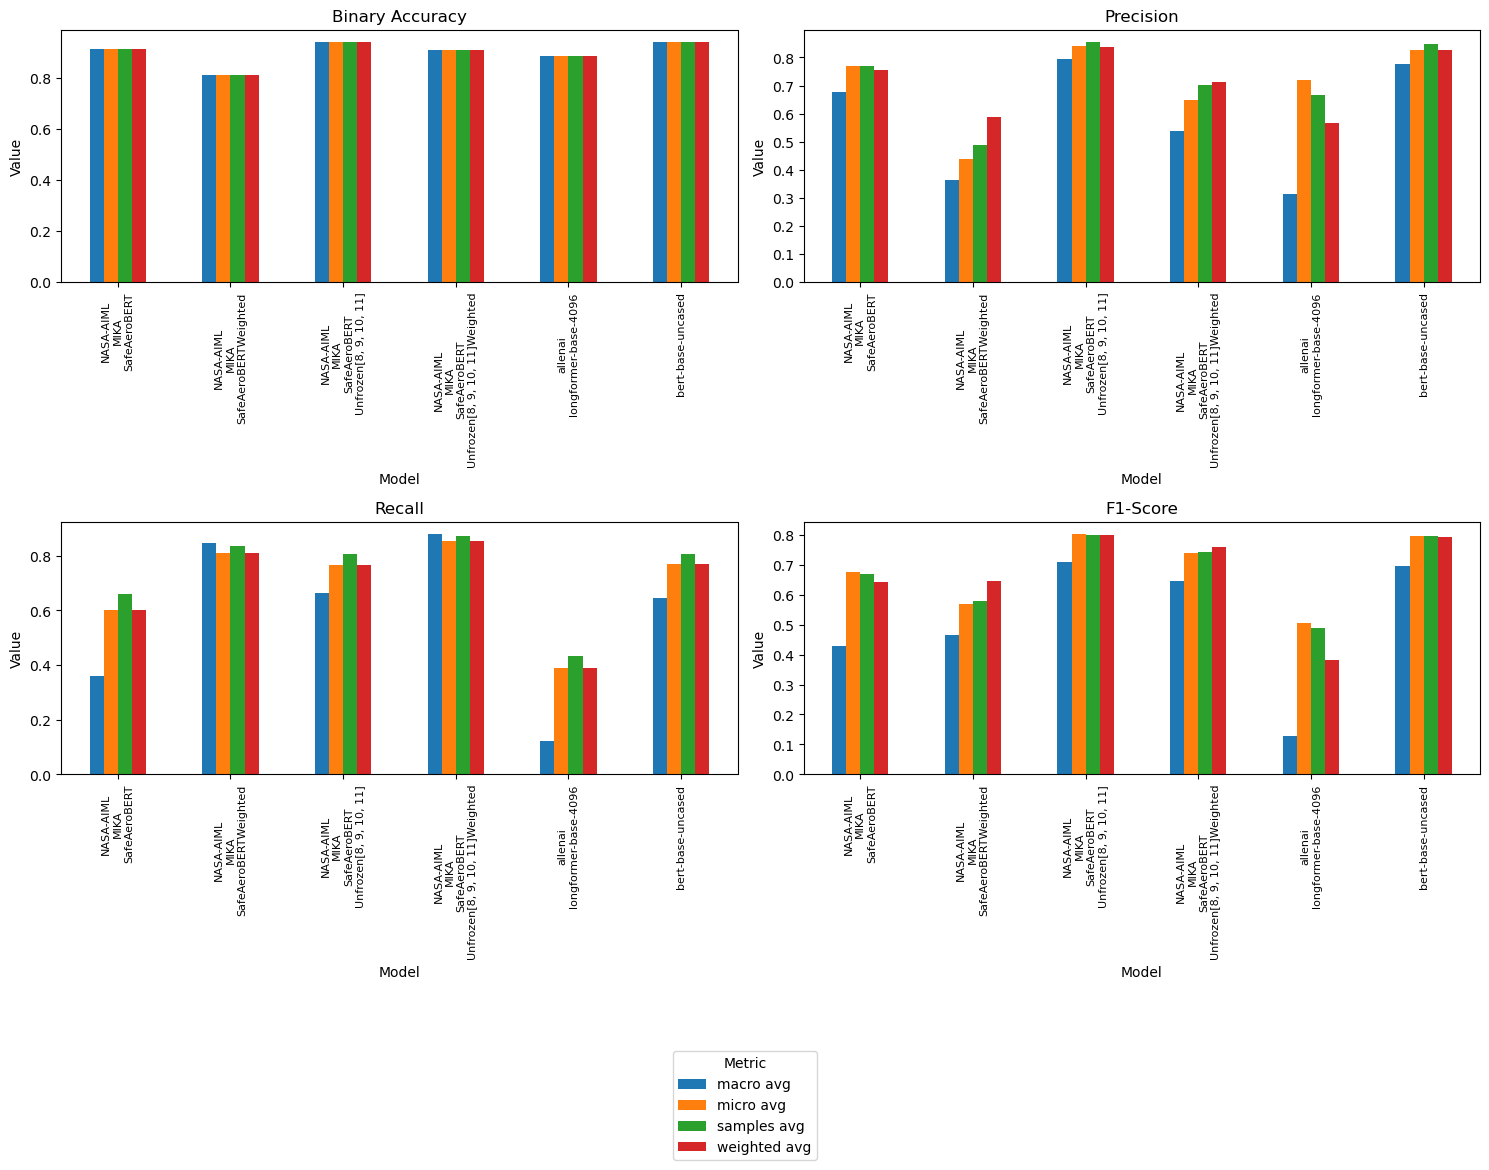

In [16]:
metrics_to_plot = ['binary_accuracy', 'precision', 'recall', 'f1-score']
plot_metrics(pivot_df, metrics_to_plot)

In [17]:
non_avg_metrics_df = df[~df['metric'].str.contains('avg')]
pivot__non_df = non_avg_metrics_df.pivot_table(index='model', columns='metric', values=['binary_accuracy', 'precision', 'recall', 'f1-score'])
pivot__non_df

binary_accuracy  \
metric                                                   ATC Issue   
model                                                                
NASA-AIML_MIKA_SafeAeroBERT                                 0.8689   
NASA-AIML_MIKA_SafeAeroBERTWeighted                         0.8142   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]          0.9155   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...          0.8763   
allenai_longformer-base-4096                                0.7812   
bert-base-uncased                                           0.9083   

                                                                       \
metric                                             Aircraft Equipment   
model                                                                   
NASA-AIML_MIKA_SafeAeroBERT                                    0.8584   
NASA-AIML_MIKA_SafeAeroBERTWeighted                            0.8461   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]             0.9133   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...             0.9076   
allenai_longformer-base-4096                                   0.7928   
bert-base-uncased                                              0.9080   

                                                                       \
metric                                             Airspace Violation   
model                                                                   
NASA-AIML_MIKA_SafeAeroBERT                                    0.9635   
NASA-AIML_MIKA_SafeAeroBERTWeighted                            0.8154   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]             0.9775   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...             0.9461   
allenai_longformer-base-4096                                   0.9624   
bert-base-uncased                                              0.9749   

                                                                              \
metric                                             Anomaly Occurred Conflict   
model                                                                          
NASA-AIML_MIKA_SafeAeroBERT                                  0.9918   0.8992   
NASA-AIML_MIKA_SafeAeroBERTWeighted                          0.8262   0.8625   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]           0.9919   0.9549   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...           0.9496   0.9296   
allenai_longformer-base-4096                                 0.9918   0.8254   
bert-base-uncased                                            0.9913   0.9512   

                                                                                  \
metric                                             Deck / Cabin / Aircraft Event   
model                                                                              
NASA-AIML_MIKA_SafeAeroBERT                                               0.9474   
NASA-AIML_MIKA_SafeAeroBERTWeighted                                       0.8530   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]                        0.9622   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...                        0.9309   
allenai_longformer-base-4096                                              0.9152   
bert-base-uncased                                                         0.9597   

                                                                         \
metric                                             Deviation - Altitude   
model                                                                     
NASA-AIML_MIKA_SafeAeroBERT                                      0.9168   
NASA-AIML_MIKA_SafeAeroBERTWeighted                              0.7574   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]               0.9563   
NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, ...               0.8701   
allenai_longformer-base-4096                                     0.9111   
bert-base-uncased         

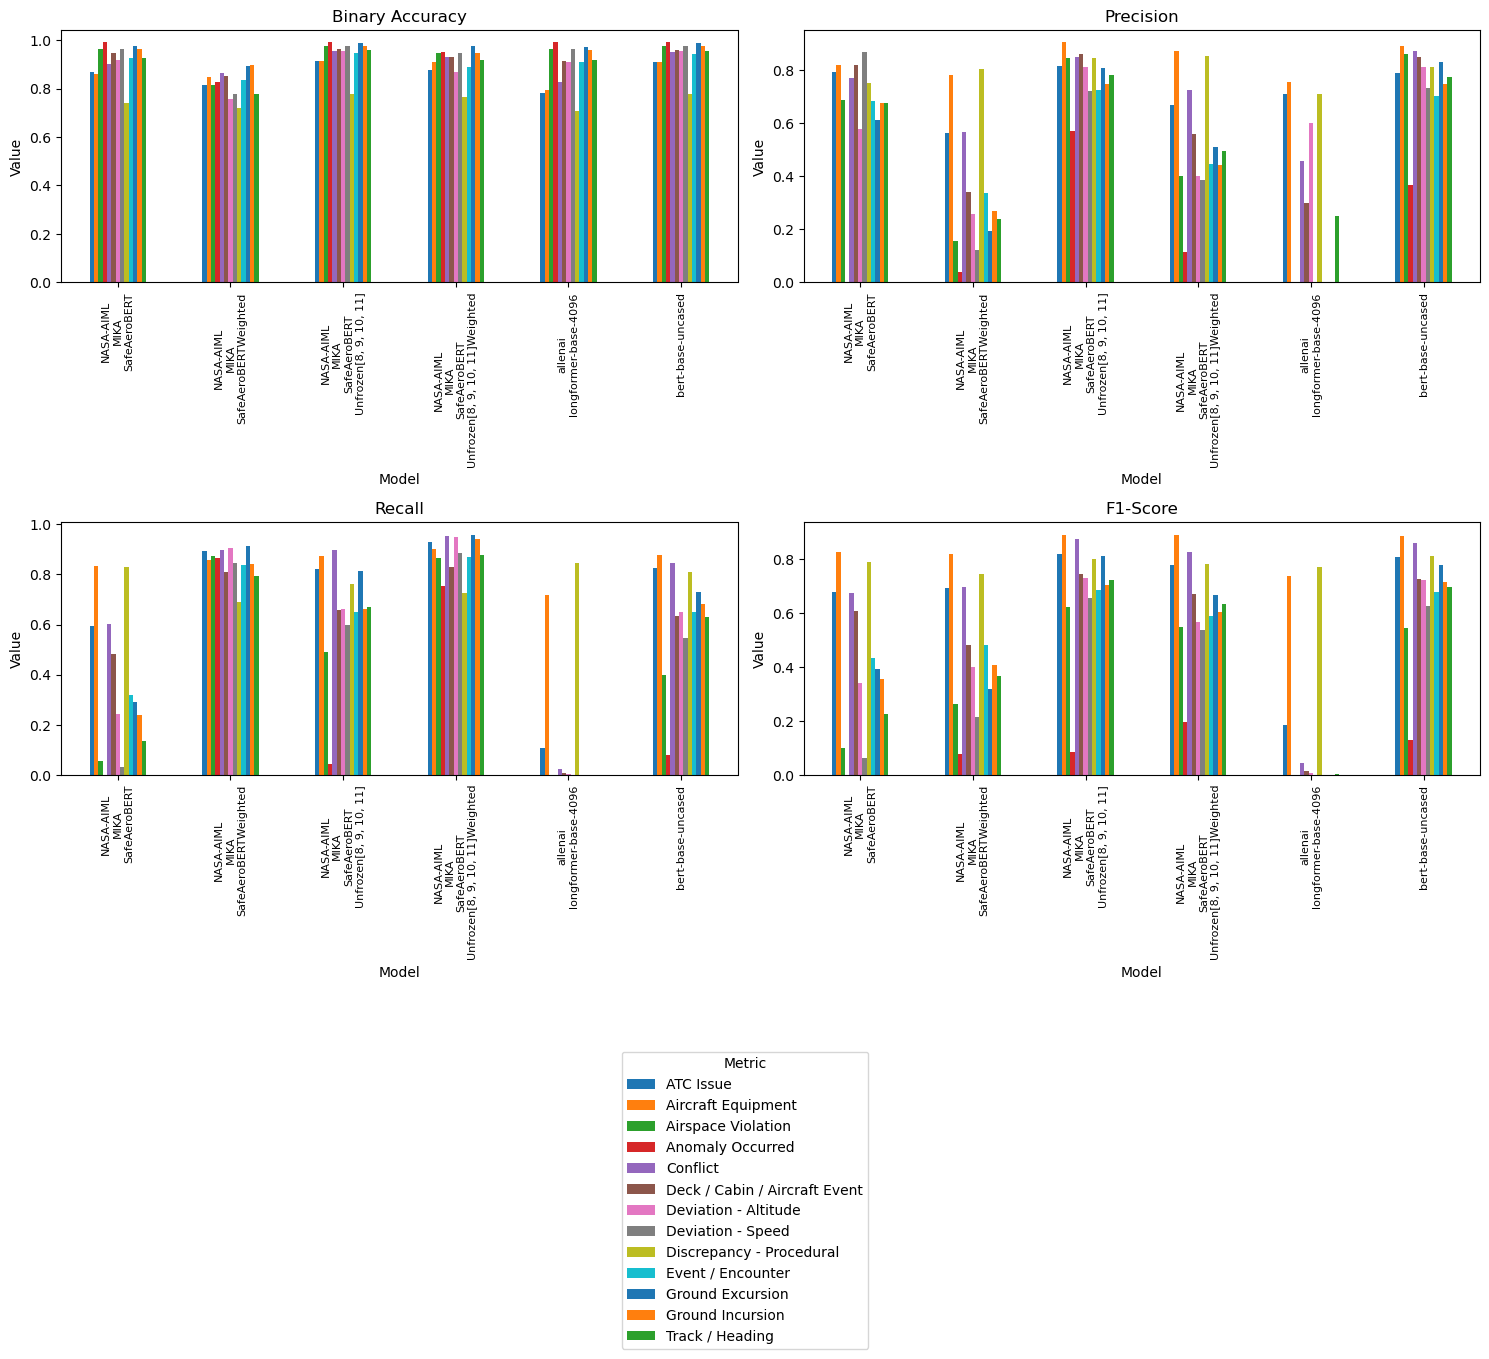

In [18]:
metrics_to_plot = ['binary_accuracy', 'precision', 'recall', 'f1-score']
plot_metrics(pivot__non_df, metrics_to_plot)